# Problem Statement 

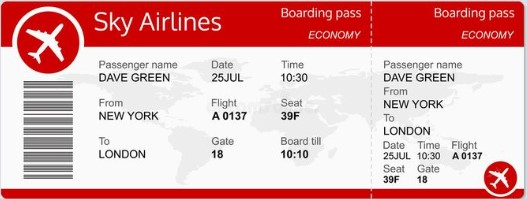

Travelling through g;ight has become an integral part of today lifestyle as more and more people are option for faster travilling option.The flight ticket price increase or decrease every now and then depanding on various factors like timimng of the flight, destination adnf duration of flight various occasions such as vacation or festival season. There fore having some basic idea of the flight fares before planning the trip wi;ll surely help many people sav3e money an tim.The main goal is to p-redict the fares of the flight based on different facors available in the provided dataset.

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
flight_df = pd.read_excel("flight_data.xlsx")

In [3]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
flight_df.shape

(10683, 11)

All the features have more than 10K rows so we can eliminate the missing values.

In [6]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


This data set has 11 features out of which price is the dependent features and rest independent features.


In [7]:
flight_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


# Null Values

In [8]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:

flight_df[flight_df.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
flight_df[flight_df.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


# Comment:
Since there are very few NAN value we can simply drop them. It will not cause any major problem

In [11]:
flight_df.dropna(inplace=True)

In [12]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Analysis and processing of Dependent features

In [13]:
flight_df.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

# Comment:
 As the Price column contains continuous integer values. so it is a Regression problem statement.

# Analysis and processing of InDependent features

In [14]:
for col in flight_df.columns:
    if col != 'Price':
        print(f"Feature Name: {col}")
        print('\n', flight_df[col].unique())
        print('\n', "Total number of unique values = ", len(flight_df[col].unique()))
        print('\n',flight_df[col].value_counts())
        print('\n','=*'*40,'\n')

Feature Name: Airline

 ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

 Total number of unique values =  12

 Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

 =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=* 

Feature Name: Date_of_Journey

 ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27

# Observation

 * Airline: In this dataset has 12 different Airline but imbalanced in nature anad can be considered as Nominal data. We just need to encode them with OneHotEncoder
*  Date_of_Journey: This features is the most important. so we modify and change into day and month columns.

# EDA & FE analysis

In [15]:
flight_df.Date_of_Journey = pd.to_datetime(flight_df.Date_of_Journey, dayfirst=True)

In [16]:
flight_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
flight_df["Day"] = flight_df.Date_of_Journey.dt.day
flight_df["Month"] = flight_df.Date_of_Journey.dt.month

# Dropping Date of journey columns as it is not requriedabs

flight_df.drop(columns=["Date_of_Journey"],inplace=True)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Modifiy Dep_Time

In [18]:
flight_df.Dep_Time = pd.to_datetime(flight_df.Dep_Time)

In [19]:
flight_df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
dtype: object

In [20]:
#create two seperate columns named "DEP_hr" and Dep_min

flight_df["Dep_hr"] = flight_df.Dep_Time.dt.hour
flight_df["Dep_min"] = flight_df.Dep_Time.dt.minute

In [21]:
flight_df.Dep_Time = flight_df.Dep_Time.apply(lambda x: float(str(x).split(" ")[-1].replace(":", ".")[:5]))

In [22]:
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


# Modify Arrival_Time

In [23]:
flight_df.Arrival_Time = pd.to_datetime(flight_df.Arrival_Time)

In [24]:
flight_df["Arrival_hr"] = flight_df.Arrival_Time.dt.hour
flight_df["Arrival_min"] = flight_df.Arrival_Time.dt.minute

In [25]:
flight_df.Arrival_Time = flight_df.Arrival_Time.apply(lambda x: float(str(x).split(" ")[-1].replace(":", ".")[:5]))

In [26]:
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13.15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,4.25,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.05,23.30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.50,21.35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# Modify Duration Feature

In [27]:
# we can convert all the values into equivallent value in min

def duration_in_min (dur):
    tt = 0
    for i in dur.split():
        if 'h' in i:
            tt += int (i[:-1])*60
        if 'm' in i:
            tt += int(i[: -1])
    return tt
flight_df.Duration = flight_df.Duration.apply(duration_in_min)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13.15,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,4.25,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.05,23.30,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.50,21.35,285,1 stop,No info,13302,1,3,16,50,21,35


# Analysis of Categorical Features

In [28]:
flight_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

As last four i.e Multiple carriers Premium economy, jet Airways Bussines,Vistara Business economy, Trujet has very few data points to train any model so we can drop them


In [29]:
l = ['Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet']
flight_df_airline = flight_df[flight_df.Airline.isin(l) == False]

In [30]:
flight_df_airline.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

Checking for available airlines from each source 

In [31]:
for s in flight_df.Source.unique():
    print("Airlines Available from", s,'\n')
    print(flight_df[flight_df.Source == s].Airline.value_counts())
    print('\n', "*"*50)

Airlines Available from Banglore 

Jet Airways                788
IndiGo                     523
Air India                  332
Vistara                    185
SpiceJet                   181
GoAir                       93
Air Asia                    89
Jet Airways Business         4
Vistara Premium economy      2
Name: Airline, dtype: int64

 **************************************************
Airlines Available from Kolkata 

Jet Airways    1256
Air India       512
IndiGo          445
SpiceJet        300
Vistara         183
Air Asia        150
GoAir            25
Name: Airline, dtype: int64

 **************************************************
Airlines Available from Delhi 

Jet Airways                          1586
Multiple carriers                    1196
Air India                             746
IndiGo                                705
SpiceJet                               87
Air Asia                               80
GoAir                                  76
Vistara                 

# Encoding "Source" and "Destination" using OneHotEncoder

In [32]:
flight_df = pd.get_dummies(flight_df, columns= ["Source", "Destination"])

In [33]:
flight_df.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,CCU → IXR → BBI → BLR,5.50,13.15,445,2 stops,No info,7662,1,5,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,DEL → LKO → BOM → COK,9.25,4.25,1140,2 stops,No info,13882,9,6,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,CCU → NAG → BLR,18.05,23.30,325,1 stop,No info,6218,12,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,BLR → NAG → DEL,16.50,21.35,285,1 stop,No info,13302,1,3,...,0,0,0,0,0,0,0,0,0,1


# Encoding "Total_Stops" using LabelEncoder

In [34]:
# uNIQUE VALUES IN "Total_stop " before encoding 

flight_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
flight_df.Total_Stops = le.fit_transform(flight_df["Total_Stops"])

In [36]:
# unique values in "Total_Stops" after encoding
flight_df.Total_Stops.unique()

array([4, 1, 0, 2, 3])

# Dropping Unnecessary features

In [37]:
flight_df.drop(columns=["Route","Additional_Info"],inplace=True)

# Final look of dataset after complition of EDA & FE

In [38]:
flight_df.head()

,Airline,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,22.20,1.10,170,4,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,5.50,13.15,445,1,7662,1,5,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,9.25,4.25,1140,1,13882,9,6,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,18.05,23.30,325,0,6218,12,5,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,16.50,21.35,285,0,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [39]:
flight_df.shape

(10682, 23)

In [40]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                10682 non-null  object 
 1   Dep_Time               10682 non-null  float64
 2   Arrival_Time           10682 non-null  float64
 3   Duration               10682 non-null  int64  
 4   Total_Stops            10682 non-null  int32  
 5   Price                  10682 non-null  int64  
 6   Day                    10682 non-null  int64  
 7   Month                  10682 non-null  int64  
 8   Dep_hr                 10682 non-null  int64  
 9   Dep_min                10682 non-null  int64  
 10  Arrival_hr             10682 non-null  int64  
 11  Arrival_min            10682 non-null  int64  
 12  Source_Banglore        10682 non-null  uint8  
 13  Source_Chennai         10682 non-null  uint8  
 14  Source_Delhi           10682 non-null  uint8  
 15  So

In [41]:
flight_df.head(3)

,Airline,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,22.20,1.10,170,4,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,5.50,13.15,445,1,7662,1,5,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,9.25,4.25,1140,1,13882,9,6,9,25,...,0,1,0,0,0,1,0,0,0,0


In [42]:
flight_df_airline_encoded = pd.get_dummies(flight_df, columns=["Airline"])

In [43]:
flight_df_airline_encoded.head(3)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,22.20,1.10,170,4,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,5.50,13.15,445,1,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,9.25,4.25,1140,1,13882,9,6,9,25,4,...,0,0,1,0,0,0,0,0,0,0


In [44]:

flight_df_airline_encoded.columns

Index(['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price', 'Day',
       'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [45]:
flight_df_casel = flight_df_airline_encoded[['Dep_Time','Arrival_Time','Duration','Total_Stops','Price', 'Day',
       'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]

In [46]:
flight_df_casel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dep_Time                                   10682 non-null  float64
 1   Arrival_Time                               10682 non-null  float64
 2   Duration                                   10682 non-null  int64  
 3   Total_Stops                                10682 non-null  int32  
 4   Price                                      10682 non-null  int64  
 5   Day                                        10682 non-null  int64  
 6   Month                                      10682 non-null  int64  
 7   Dep_hr                                     10682 non-null  int64  
 8   Dep_min                                    10682 non-null  int64  
 9   Arrival_hr                                 10682 non-null  int64  
 10  Arrival_min           

In [47]:
flight_df_case2 = flight_df_airline_encoded[['Duration','Total_Stops','Price', 'Day',
       'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]

In [48]:
flight_df_case2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10682 non-null  int64
 1   Total_Stops                                10682 non-null  int32
 2   Price                                      10682 non-null  int64
 3   Day                                        10682 non-null  int64
 4   Month                                      10682 non-null  int64
 5   Dep_hr                                     10682 non-null  int64
 6   Dep_min                                    10682 non-null  int64
 7   Arrival_hr                                 10682 non-null  int64
 8   Arrival_min                                10682 non-null  int64
 9   Source_Banglore                            10682 non-null  uint8
 10  Source_Chennai                             106

# Graphical Analysis of Independent and Dependent Features

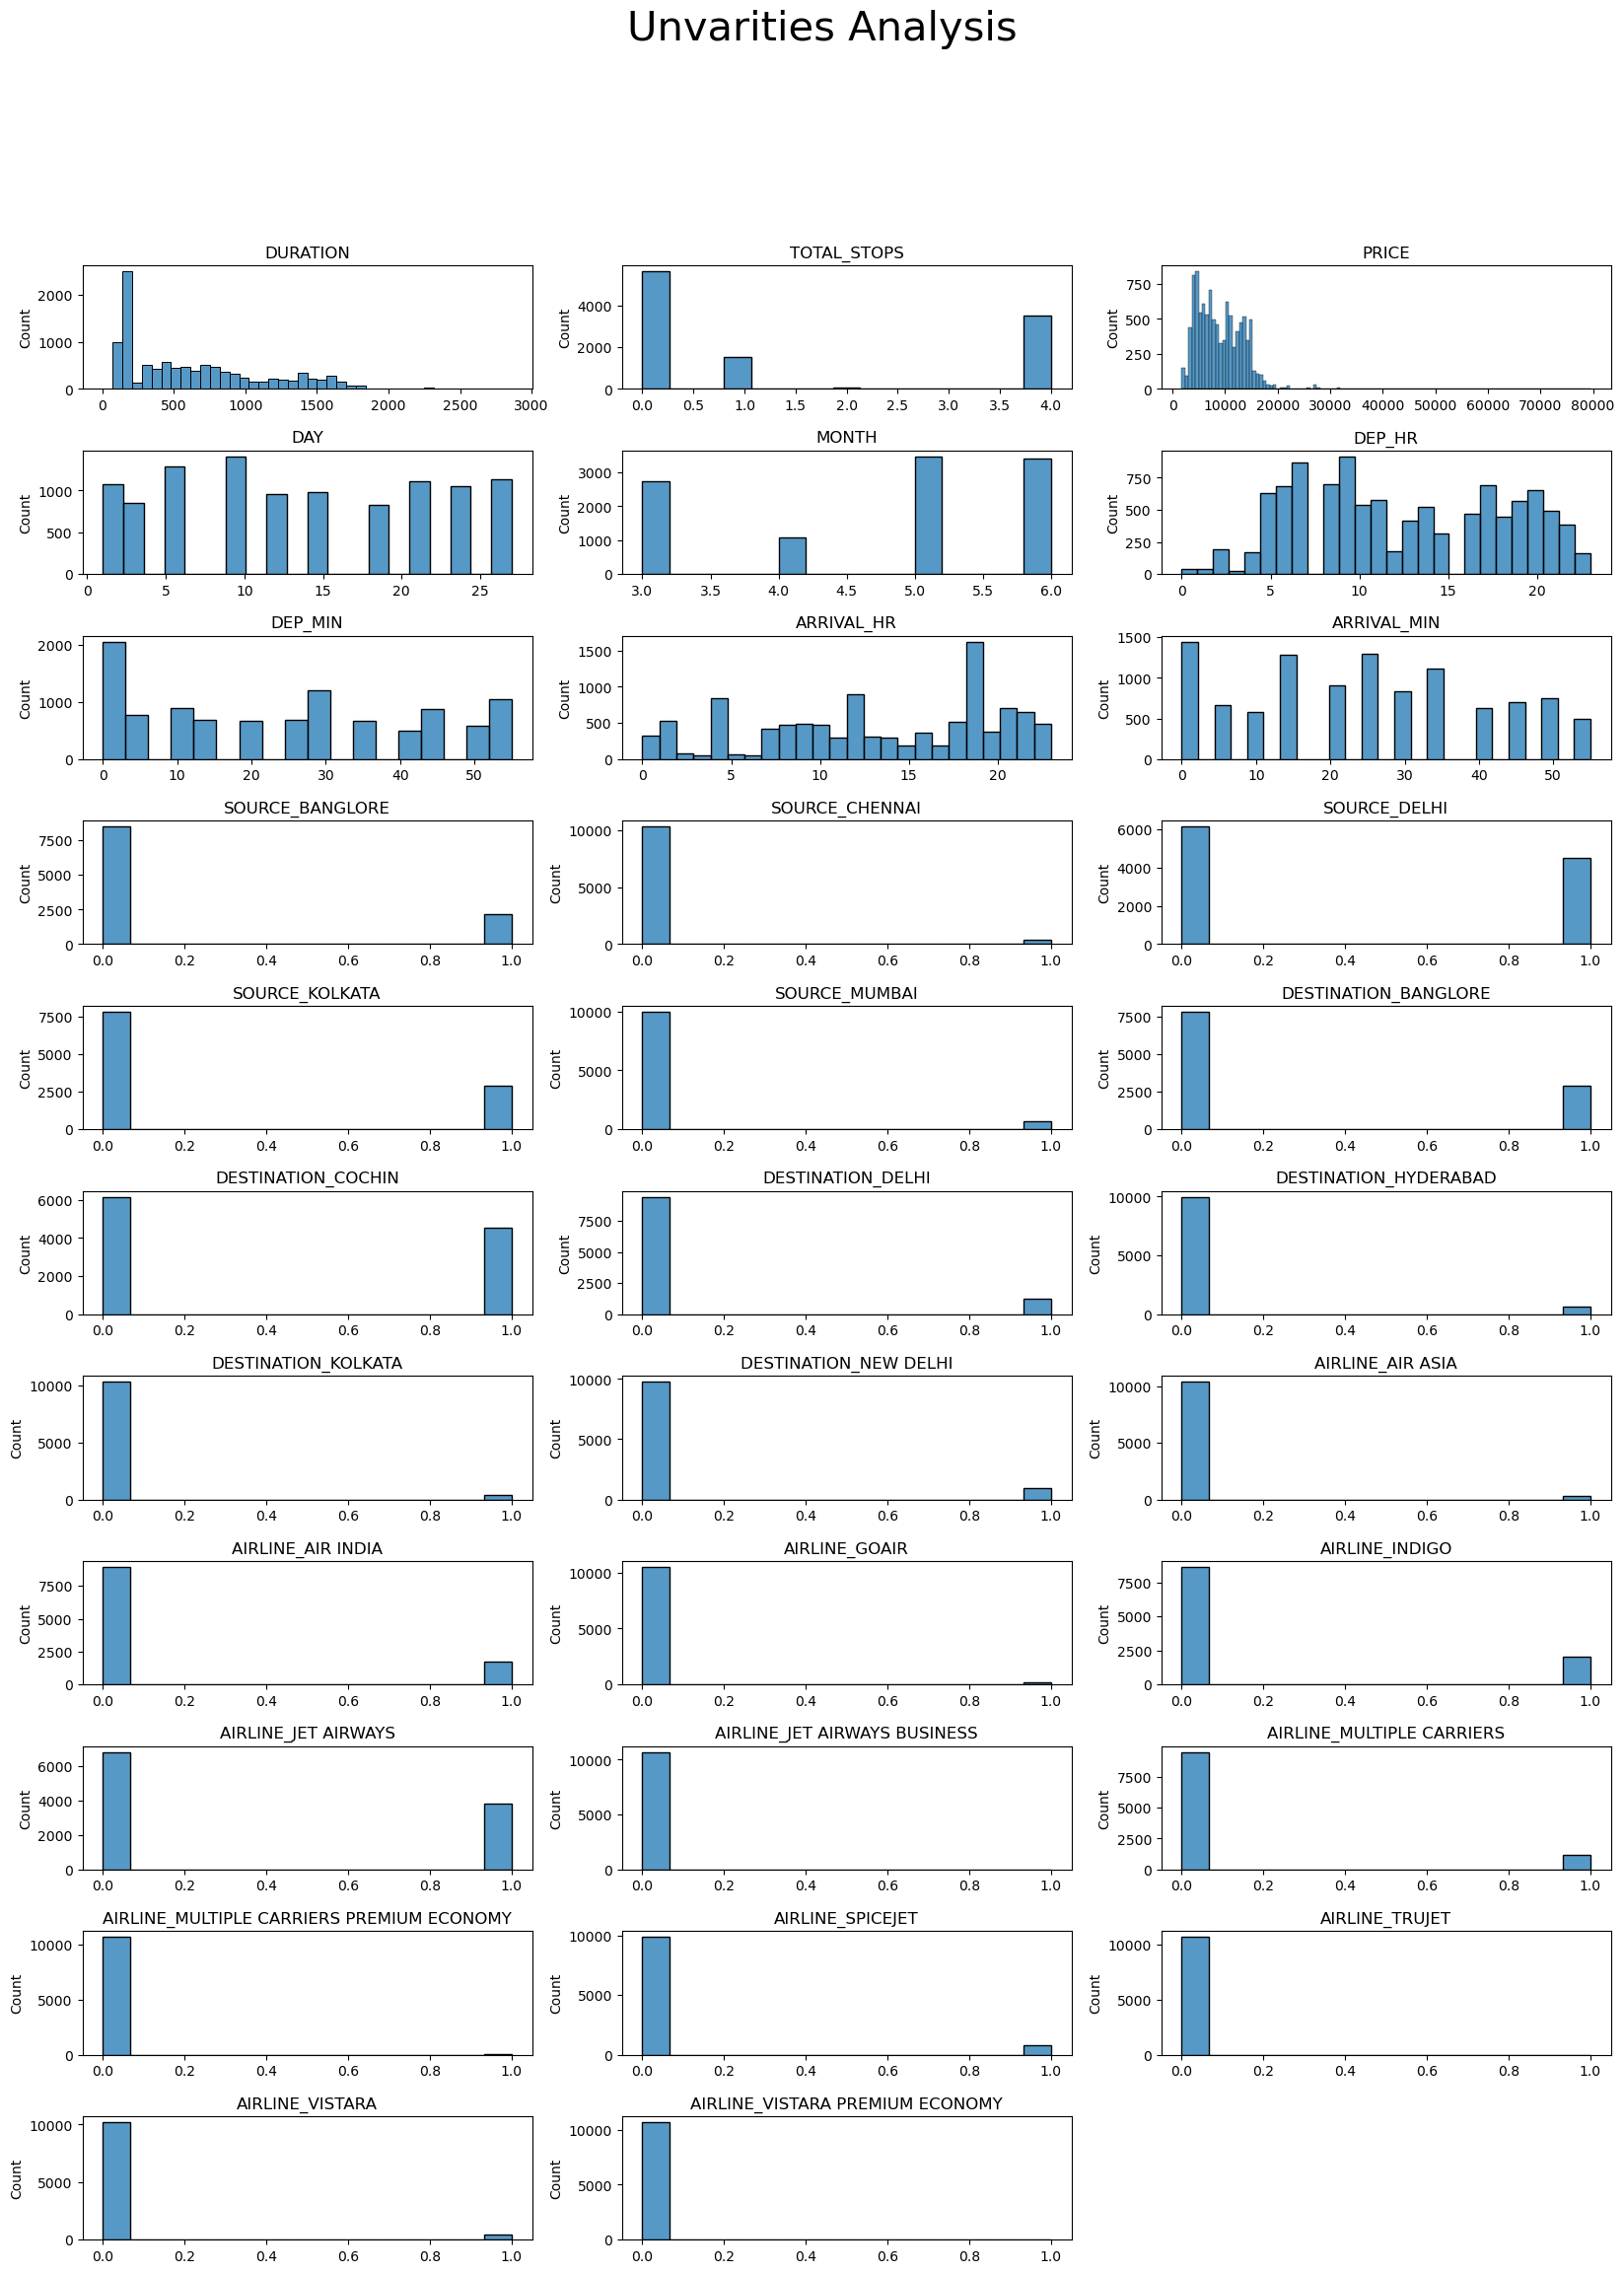

In [49]:
plt.figure(figsize=(20,26))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Unvarities Analysis", fontsize=30,ha='center', va='top')

#loop through the length of tickers and keep track of index
for n, col in enumerate(flight_df_case2.columns):
    # add a new subplot iteratively
    ax = plt.subplot(11,3,n +1)
    
    #filter df and plot ticker  on the new subplot axis
    sns.histplot(data=flight_df_case2[col])
    #chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

# Multicollinearity

In [50]:
#plot color scalled correlation matrix

corr = flight_df_case2.iloc[:,:].corr()
corr.style.background_gradient(cmap='coolwarm')

,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
Duration,1.000000,-0.602282,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663,-0.267239,-0.190651,0.295776,0.124437,-0.234809,0.124437,0.295776,-0.340182,-0.234809,-0.190651,0.006732,-0.101836,0.261553,-0.092147,-0.343503,0.305519,-0.011968,-0.012063,-0.002508,-0.263434,-0.008537,-0.019033,-0.016163
Total_Stops,-0.602282,1.000000,-0.571221,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980,0.397025,0.270634,-0.482296,-0.113010,0.315130,-0.113010,-0.482296,0.515760,0.315130,0.270634,-0.021872,0.081551,-0.007335,0.033030,0.261658,-0.262310,-0.014764,-0.276971,-0.028182,0.289853,-0.007812,0.089530,0.023586
Price,0.506480,-0.571221,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,-0.118044,-0.179223,0.270676,0.009358,-0.230755,0.009358,0.270676,-0.313417,-0.230755,-0.179223,0.189777,-0.133050,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454
Day,-0.022439,0.029225,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.050438,0.006611,0.100088,-0.060558,-0.014030,-0.060558,0.100088,0.002632,-0.014030,0.006611,-0.075254,0.008926,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115
Month,0.014836,-0.026328,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,-0.244418,0.005650,0.139222,0.087177,-0.039352,0.087177,0.139222,0.090490,-0.039352,0.005650,-0.453685,0.005652,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797
Dep_hr,0.002088,0.039224,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,-0.007887,-0.014846,-0.118780,0.155471,-0.017292,0.155471,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,0.045960,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375
Dep_min,-0.019099,0.048901,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,0.077354,0.067110,-0.085534,-0.024238,0.037705,-0.024238,-0.085534,0.003200,0.037705,0.067110,0.107129,0.158211,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380
Arrival_hr,0.051531,-0.095650,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.024419,-0.014795,-0.006790,0.054693,-0.033512,0.054693,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,-0.034993,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776
Arrival_min,-0.069663,0.175980,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,0.090993,-0.030493,-0.209882,0.118573,0.081196,0.118573,-0.209882,0.095250,0.081196,-0.030493,0.021271,0.078261,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314
Source_Banglore,-0.267239,0.397025,-0.118044,-0.050438,-0.244418,-0.007887,0.077354,-0.024419,0.090993,1.000000,-0.097862,-0.437149,-0.308498,-0.134441,-0.308498,-0.437149,0.720278,-0.134441,-0.097862,0.607598,0.031828,-0.017601,0.092099,0.059224,-0.001754,0.027038,-0.180681,-0.017762,0.011113,-0.004924,0.096785,0.019116


<AxesSubplot:>

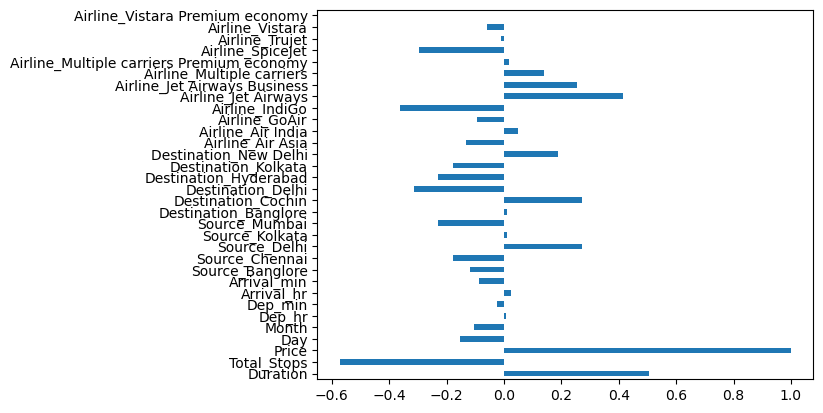

In [51]:
corr.Price.plot(kind='barh')

# Comment:
    Most important independant features are Total_Stops & Duration

<AxesSubplot:>

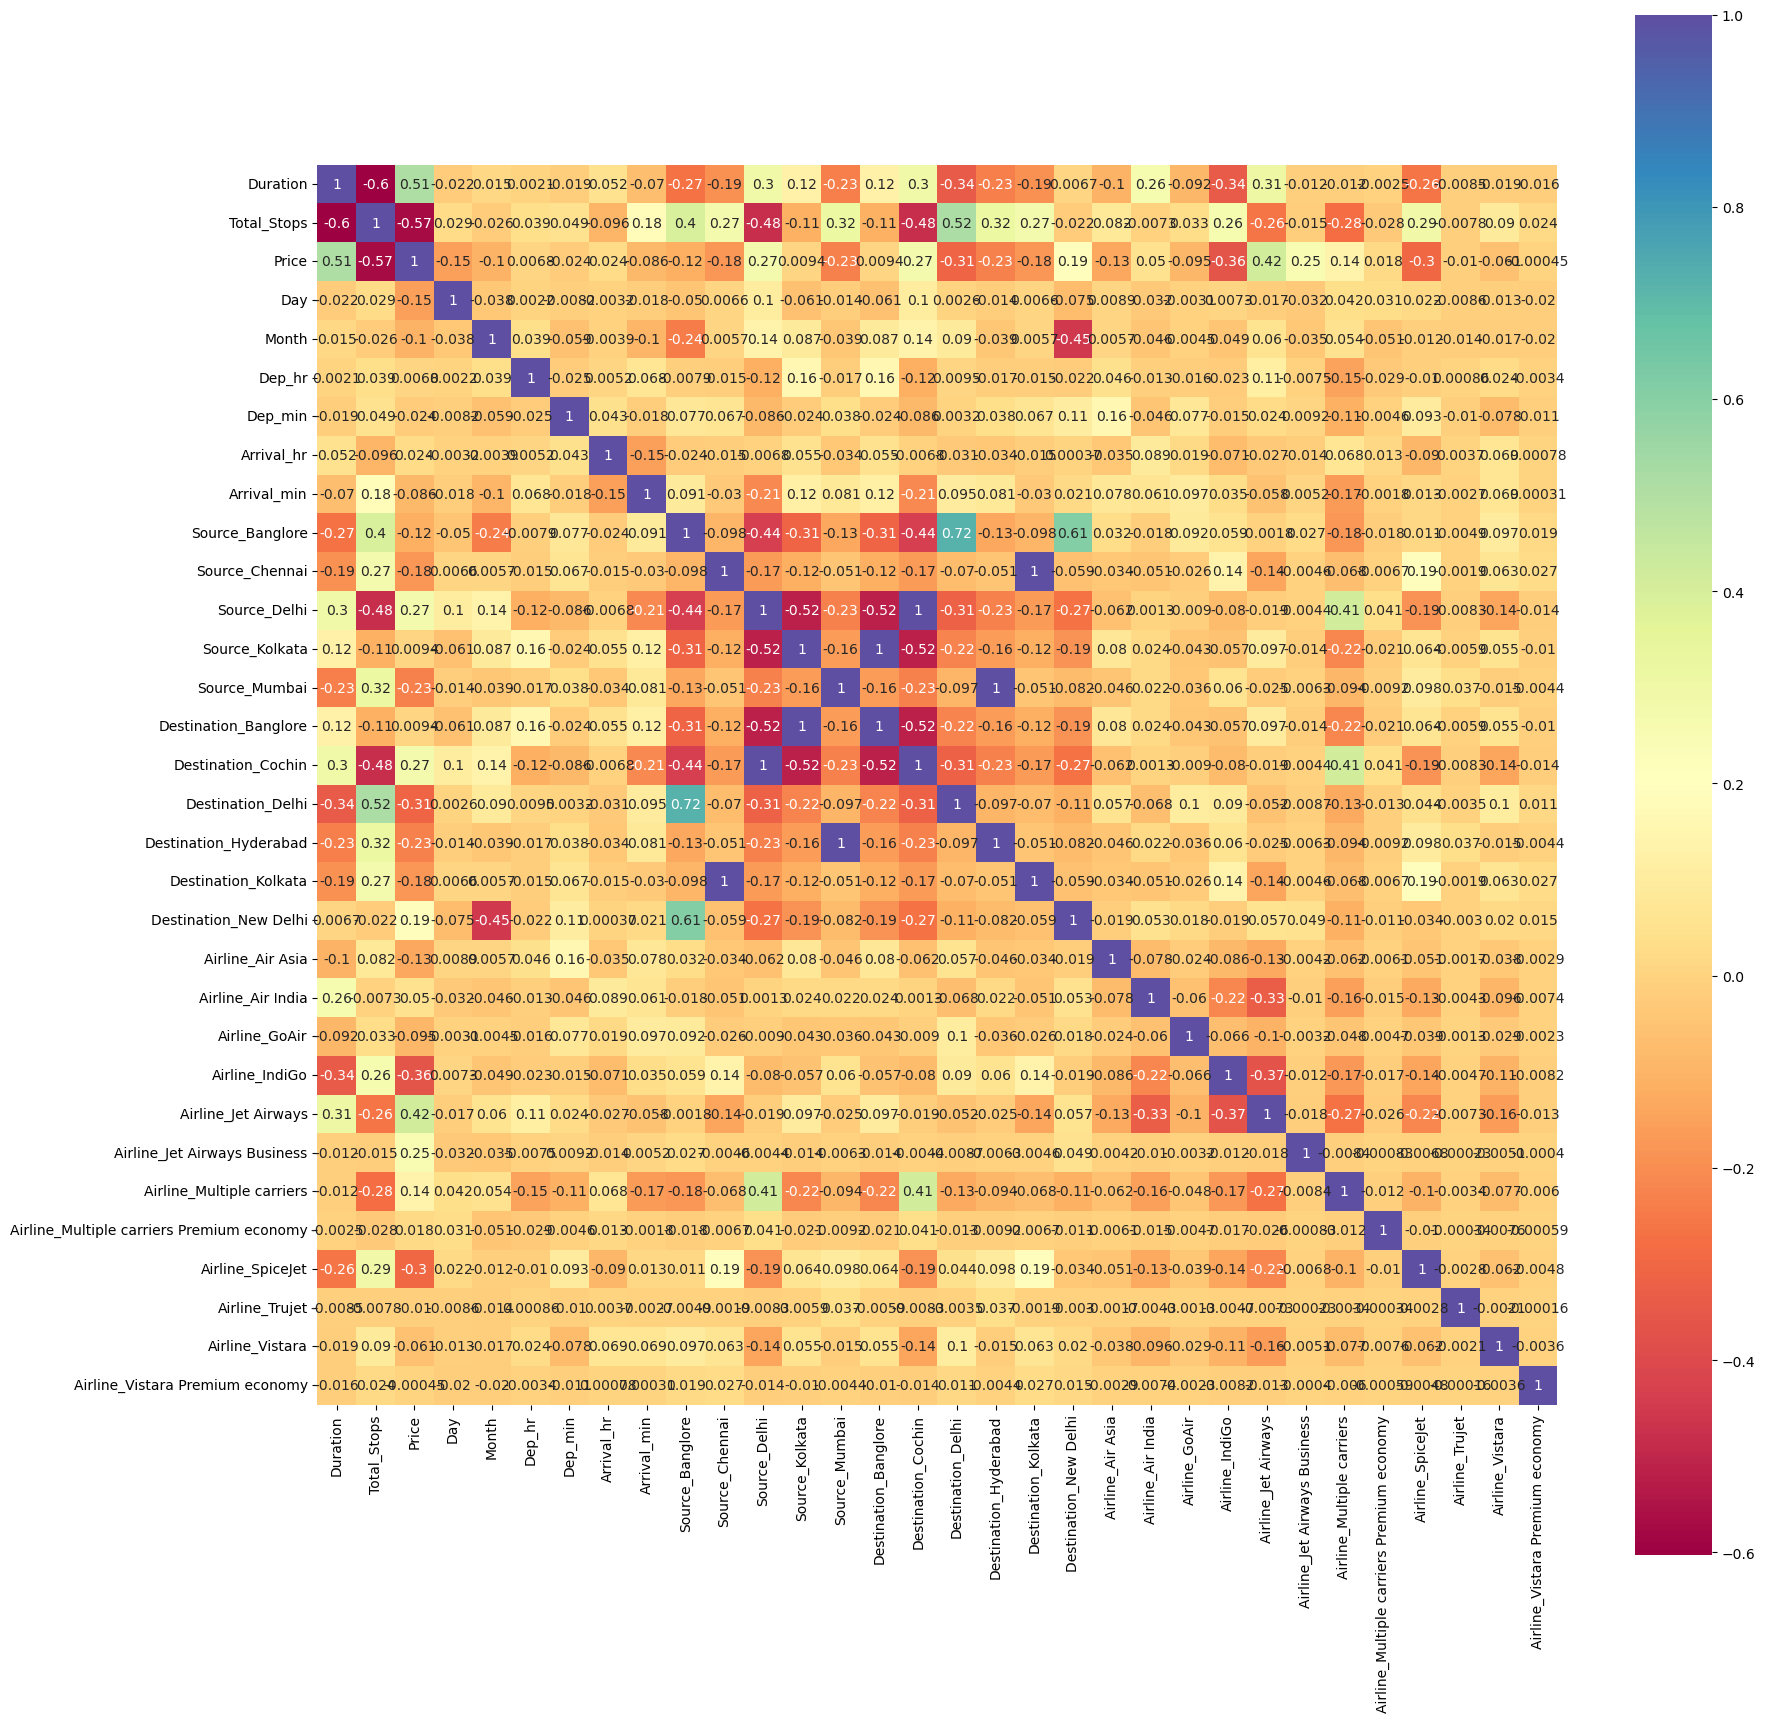

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True, cmap='Spectral',square=True)

In [53]:
vif = pd.DataFrame()
vif["features"] = flight_df_casel.columns[1:]
vif["vif_Factor"] = [variance_inflation_factor(flight_df_casel.iloc[:,1:].values, i) for i in range (flight_df_casel.iloc[:,1:].shape[1])]
vif

C:\Users\lucky\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,Arrival_Time,inf
1,Duration,2.157419
2,Total_Stops,3.167571
3,Price,2.440263
4,Day,1.075135
5,Month,1.334056
6,Dep_hr,1.057395
7,Dep_min,1.094723
8,Arrival_hr,inf
9,Arrival_min,inf


# Model Building

# Case-1 

In [54]:
flight_df_casel.head(3)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,22.20,1.10,170,4,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,5.50,13.15,445,1,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,9.25,4.25,1140,1,13882,9,6,9,25,4,...,0,0,1,0,0,0,0,0,0,0


# Seperate independent adn dependent Features

In [55]:
x1 = flight_df_casel.drop(columns=['Price'])
y1 = flight_df_casel.Price
x1.head(5)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,22.20,1.10,170,4,24,3,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,5.50,13.15,445,1,1,5,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,9.25,4.25,1140,1,9,6,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,18.05,23.30,325,0,12,5,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,16.50,21.35,285,0,1,3,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


In [56]:
y1.head(5)

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train,y1_test = train_test_split(x1,y1, test_size=0.25, random_state=42)

### Algorith: DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dt_gen_1 = DecisionTreeRegressor()
dt_gen_1.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [60]:
y1_pred_dt = dt_gen_1.predict(x1_test)

In [61]:
print("Train Score = ",dt_gen_1.score(x1_train,y1_train))
print("Test Score = ",dt_gen_1.score(x1_test,y1_test))

Train Score =  0.9707490055980877
Test Score =  0.7491861717986213


In [62]:
from sklearn import metrics
print('MEA: ',metrics.mean_absolute_error(y1_test,y1_pred_dt))
print('MSE: ',metrics.mean_squared_error(y1_test,y1_pred_dt))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y1_test,y1_pred_dt)))
print("R2 Score: ",metrics.r2_score(y1_test,y1_pred_dt))

MEA:  1315.3567952077874
MSE:  5170032.066859478
RMSE :  36.26784795390798
R2 Score:  0.7491861717986213


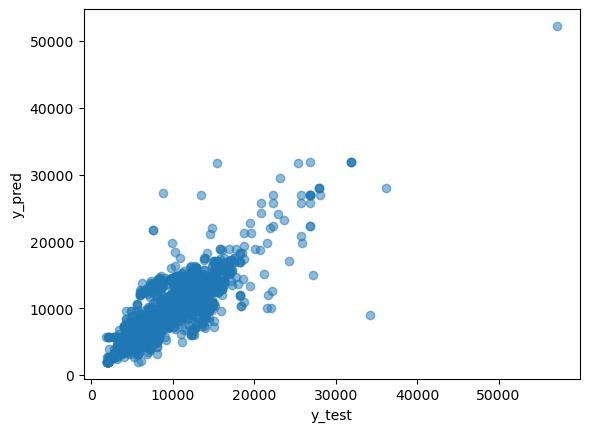

In [63]:
plt.scatter(y1_test,y1_pred_dt, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Algorithm : RandomForestRegressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_gen_1 = RandomForestRegressor()
rf_gen_1.fit(x1_train,y1_train)

RandomForestRegressor()

In [65]:
y1_pred_rf = rf_gen_1.predict(x1_test)

In [66]:
print("Train Score = ",rf_gen_1.score(x1_train,y1_train))
print("Test Score = ",rf_gen_1.score(x1_test,y1_test))

Train Score =  0.9525022905863916
Test Score =  0.818792823012926


In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred_rf))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_rf)))
print('R2 Score:', metrics.r2_score(y1_test, y1_pred_rf))

MAE: 1146.195787220766
MSE: 3735228.3264703355
RMSE: 1932.6738800093344
R2 Score: 0.818792823012926


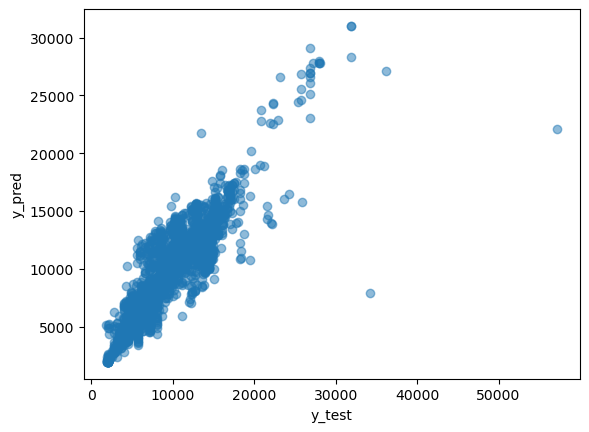

In [68]:
plt.scatter(y1_test, y1_pred_rf,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Algorithm: GradientBoostingRegressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gb_gen_1 = GradientBoostingRegressor()
gb_gen_1.fit(x1_train,y1_train)

GradientBoostingRegressor()

In [70]:
y1_pred_gb = rf_gen_1.predict(x1_test)

In [71]:
print("Train Score = ",gb_gen_1.score(x1_train,y1_train))
print("Test Score = ",gb_gen_1.score(x1_test,y1_test))

Train Score =  0.7846552969963402
Test Score =  0.784909693297881


In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred_gb))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_gb)))
print('R2 Score:', metrics.r2_score(y1_test, y1_pred_gb))

MAE: 1146.195787220766
MSE: 3735228.3264703355
RMSE: 1932.6738800093344
R2 Score: 0.818792823012926


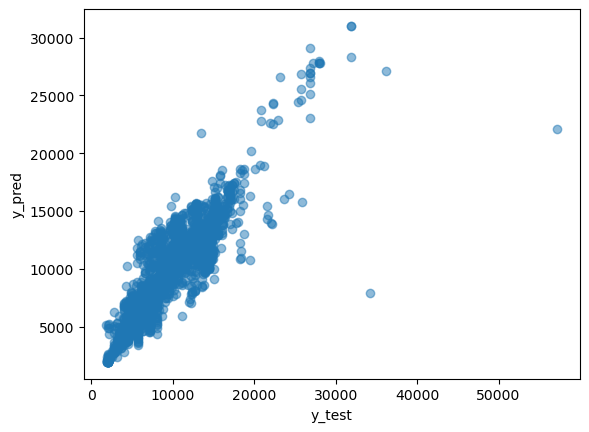

In [73]:
plt.scatter(y1_test,y1_pred_gb,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# CASE-2

In [74]:
flight_df_case2.head(5)

,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,170,4,3897,24,3,22,20,1,10,1,...,0,1,0,0,0,0,0,0,0,0
1,445,1,7662,1,5,5,50,13,15,0,...,0,0,0,0,0,0,0,0,0,0
2,1140,1,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,0,0,0,0,0
3,325,0,6218,12,5,18,5,23,30,0,...,0,1,0,0,0,0,0,0,0,0
4,285,0,13302,1,3,16,50,21,35,1,...,0,1,0,0,0,0,0,0,0,0


### Seperate Independent and Dependent Features

In [75]:
x2 = flight_df_case2.drop(columns=['Price'])
y2 = flight_df_case2.Price

In [76]:
x2.head(3)

,Duration,Total_Stops,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,170,4,24,3,22,20,1,10,1,0,...,0,1,0,0,0,0,0,0,0,0
1,445,1,1,5,5,50,13,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1140,1,9,6,9,25,4,25,0,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
y2.head(3)

0     3897
1     7662
2    13882
Name: Price, dtype: int64

# Train test Split

In [78]:
from sklearn.model_selection import train_test_split
x2_train,x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.25,random_state=42)

## Algorithm: DecisionTreeRegressor

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# model training 
dt_gen_2 = DecisionTreeRegressor()
dt_gen_2.fit(x2_train,y2_train)

DecisionTreeRegressor()

In [80]:
# model testing
y2_pred_dt = dt_gen_2.predict(x2_test)

# model performance 

print("Train Score : ", dt_gen_2.score(x2_train,y2_train))
print("Test Score = ",dt_gen_2.score(x2_test,y2_test))

Train Score :  0.9707490055980877
Test Score =  0.7552192655430284


In [81]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred_dt))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_dt)))
print('R2 Score:', metrics.r2_score(y2_test, y2_pred_dt))

MAE: 1303.4160114813428
MSE: 5045671.746120263
RMSE: 2246.257275140197
R2 Score: 0.7552192655430284


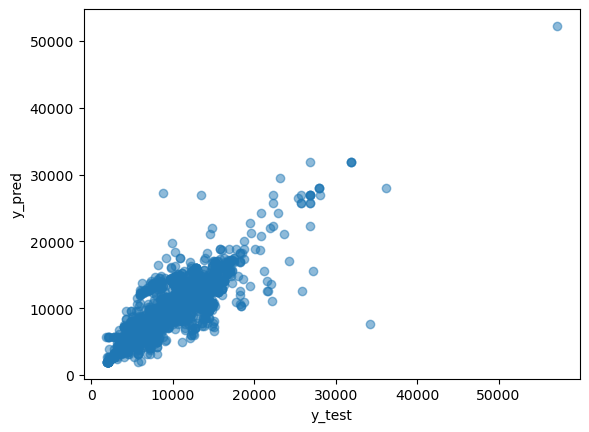

In [82]:
# predicted vs true
plt.scatter(y2_test,y2_pred_dt, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel('y_pred')
plt.show()

# Algorithm : RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
# model training 
rf_gen_2 = RandomForestRegressor()
rf_gen_2.fit(x2_train, y2_train)


RandomForestRegressor()

In [84]:
#model testing 

y2_pred_rf = rf_gen_2.predict(x2_test)

In [85]:
#model performance

print("Train Score = ",rf_gen_2.score(x2_train,y2_train))
print("Test Score = ",rf_gen_2.score(x2_test,y2_test))

Train Score =  0.9524132423116599
Test Score =  0.8215522572621289


In [86]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred_rf))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_rf)))
print('R2 Score:', metrics.r2_score(y2_test, y2_pred_rf))

MAE: 1143.8339383162804
MSE: 3678348.0353911887
RMSE: 1917.901987952249
R2 Score: 0.8215522572621289


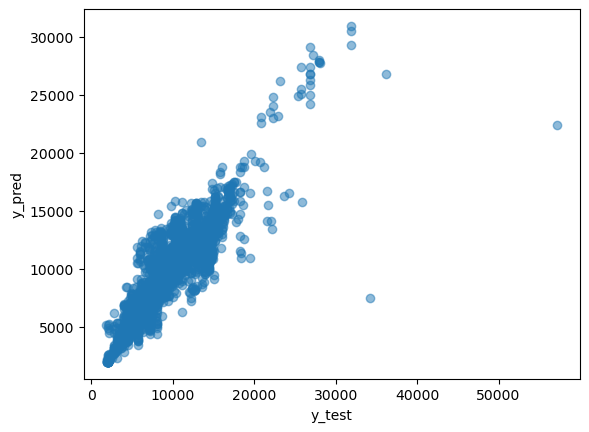

In [87]:
#predicted vs true
plt.scatter(y2_test, y2_pred_rf, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Algorithm : GradientBoostingRegressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gb_gen_2 = GradientBoostingRegressor()
gb_gen_2.fit(x2_train,y2_train)

GradientBoostingRegressor()

In [89]:
y2_pred_gb = rf_gen_2.predict(x2_test)

In [90]:
print("Train Score = ",gb_gen_2.score(x2_train,y2_train))
print("Test Score = ",gb_gen_2.score(x2_test,y2_test))

Train Score =  0.7805053951328912
Test Score =  0.7811844610594517


In [91]:
from sklearn import metrics
print("MEA: ",metrics.mean_absolute_error(y2_test,y2_pred_gb))
print("MSE: ",metrics.mean_squared_error(y2_test,y2_pred_gb))
print("RMSE: ",np.sqrt(metrics.mean_absolute_error(y2_test,y2_pred_gb)))
print('R2 Score: ',metrics.r2_score(y2_test,y2_pred_gb))

MEA:  1143.8339383162804
MSE:  3678348.0353911887
RMSE:  33.82061410318092
R2 Score:  0.8215522572621289


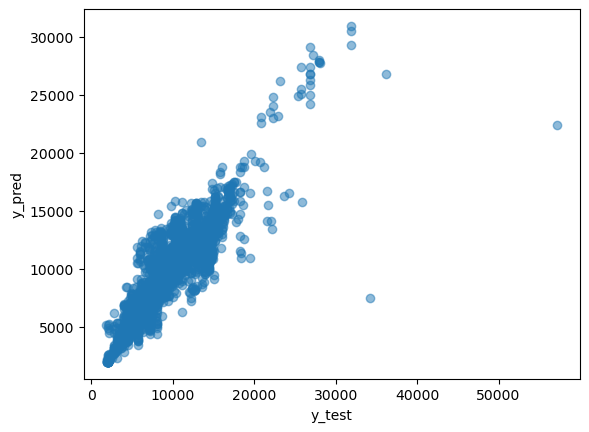

In [92]:
plt.scatter(y2_test,y2_pred_gb,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Observation:
We are getting highest acuracy in CASE-2 with RandomForestRegressor model

We will perform Hyperparameter Tuning for model named rf_gen_2.

### Hyperparameter Tuning for the best performing model

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
param_distributions = {'max_depth': list(range(5,55,5)),
                        'max_features': ['log2', 'sqrt'],
                        'min_samples_leaf': list(range(1,6)),
                        'min_samples_split': list(range(1,100,2)),
                        'n_estimators': list(range(100,1300,100))}

In [95]:
random = RandomizedSearchCV(estimator=rf_gen_2, param_distributions=param_distributions, n_iter=30, cv=10, verbose=2, n_jobs=6)

In [96]:
random.fit(x2_train, y2_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=6,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 19,
                                                              21, 23, 25, 27,
                                                              29, 31, 33, 35,
                                                              37, 39, 41, 43,
                                                              45, 47, 49, 51,
                                                              53, 55, 57, 59, ...],
                                        'n_es

In [97]:
random.best_params_

{'n_estimators': 400,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 45}

In [98]:
random.best_score_

0.8065476669295106

In [99]:
random.best_estimator_


RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=7,
                      n_estimators=400)

In [100]:
gen_model = RandomForestRegressor(max_depth=30, max_features='log2',min_samples_split=7,n_estimators=400)
gen_model.fit(x2_train,y2_train)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_split=7,
                      n_estimators=400)

# model Dumping

In [101]:
import pickle
pickle.dump(rf_gen_2,open('gen_pred_model.pkl','wb'))
pickle.dump(flight_df_case2,open('train_data_modified.pkl','wb'))

# Testing with Dumped Model

In [102]:
best_model = pickle.load(open('gen_pred_model.pkl','rb'))

In [103]:
best_model.feature_names_in_

array(['Duration', 'Total_Stops', 'Day', 'Month', 'Dep_hr', 'Dep_min',
       'Arrival_hr', 'Arrival_min', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy'], dtype=object)

In [104]:
pred = best_model.predict(x2_test)

In [105]:
print('R2 Score: ',metrics.r2_score(y2_test,pred) )

R2 Score:  0.8215522572621289


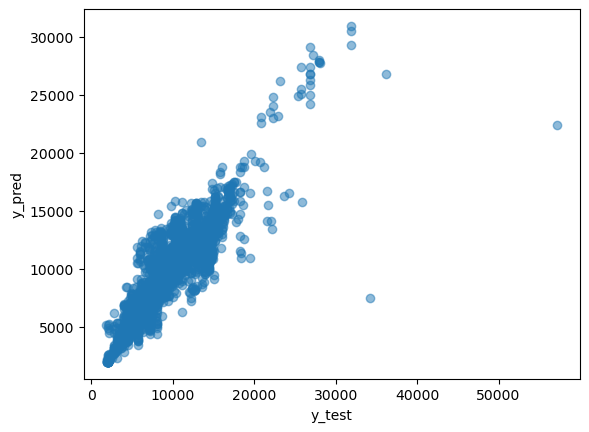

In [106]:
plt.scatter(y2_test,y2_pred_gb,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Transform Test Data and Predict

In [107]:
def transformer_test_data(df: pd.DataFrame)-> pd.DataFrame:
    
    # initial validation
    features = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
    missing_features=[]
    for f in features:
        if f not in df.columns:
            missing_features.append(f)
    
    if len(missing_features) == 0:
        
        # drop unnecessary features if present
        useless = ["Route", "Additional_Info"]
        for i in useless:
            if i in df.columns:
                df.drop(columns=[i], inplace=True)
                
        # drop NaN values
        df.dropna(inplace=True)

        # type casting of Date_of_journey column
        df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey, dayfirst=True)

        # creating Day and Month columns that contain integer values
        df["Day"] = df.Date_of_Journey.dt.day
        df["Month"] = df.Date_of_Journey.dt.month

        # Dropping "Date_of_Journey" column as it is not required anymore
        df.drop(columns=["Date_of_Journey"], inplace=True)

        # change data type of Dep_Time from object to datetime
        df.Dep_Time = pd.to_datetime(df.Dep_Time)

        # create two seperate columns named "Dep_hr" and "Dep_min"
        df["Dep_hr"] = df.Dep_Time.dt.hour
        df["Dep_min"] = df.Dep_Time.dt.minute

        # Dropping "Dep_Time" column as it is not required anymore
        df.drop(columns=["Dep_Time"], inplace=True)

        # change data type of Arrival_Time from object to datetime
        df.Arrival_Time = pd.to_datetime(df.Arrival_Time)

        # create two seperate columns named "Arrival_hr" and "Arrival_min"
        df["Arrival_hr"] = df.Arrival_Time.dt.hour
        df["Arrival_min"] = df.Arrival_Time.dt.minute

        # Dropping "Arrival_Time" column as it is not required anymore
        df.drop(columns=["Arrival_Time"], inplace=True)

        # we can convert all the values in Duration column into equivallent value in min
        def duration_in_min(dur):
            tt = 0
            for i in dur.split():
                if 'h' in i:
                    tt += int(i[:-1])*60
                if 'm' in i:
                    tt += int(i[:-1])
            return tt

        df.Duration = df.Duration.apply(duration_in_min)
        
        # Apply LabelEncoder on "Total_Stops" column
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df.Total_Stops = le.fit_transform(df["Total_Stops"])
        
        print(list(df.columns))

        # insert missing categorical(Nominal) values
        airlines=['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir',
                 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business',
                'Multiple carriers Premium economy', 'Trujet']
        source=['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
        destination=['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
        
        if len(airlines) > len(df.Airline.unique()):
            for i in set(airlines).difference(list(df.Airline.unique())):
                df.loc[len(df.index)] = [i, 'Kolkata', 'Banglore', 120, 0, 12, 8, 8, 30, 10, 30]

        # Apply OneHotEncode on "Airline", "Source", "Destination" columns
        df = pd.get_dummies(df, columns=["Source", "Destination", "Airline"])


        # final check that all required columns are present
        req_cols = ['Duration', 'Total_Stops', 'Day',
       'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']
        missing_columns=[]
        for col in req_cols:
            if col not in df.columns:
                missing_columns.append(col)
        if len(missing_columns) == 0:
            return df
        else:
            raise Exception(f"These features are missing in test data : {missing_columns}")
    else:
        raise Exception(f"These features are missing in test data : {missing_features}")

In [108]:
Test_df = pd.read_excel("Test_set.xlsx")
Test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [109]:
x_test = transformer_test_data(Test_df)

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Day', 'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min']


In [110]:
x_test.tail()

,Duration,Total_Stops,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
2667,155,4,27,3,14,20,16,55,0,0,...,0,1,0,0,0,0,0,0,0,0
2668,395,0,6,3,21,50,4,25,0,0,...,0,0,1,0,0,0,0,0,0,0
2669,915,0,6,3,4,0,19,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2670,860,0,15,6,4,55,19,15,0,0,...,0,0,0,0,1,0,0,0,0,0
2671,120,0,12,8,8,30,10,30,0,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
test_pred = best_model.predict(x_test)
test_pred

array([10789.105     ,  4247.        , 15087.46133333, ...,
       13432.93      ,  7452.96      ,  7477.69333333])

### Insert the poredicted values in Price column in test data

In [112]:
Test_df = pd.read_excel('Test_set.xlsx')
Test_df['Price'] = test_pred[:-1]
Test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,10789.105000
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4247.000000
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,15087.461333
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,12964.178500
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,3674.200000


In [113]:
data = Test_df[Test_df["Airline"]!="Air Asia"]
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,10789.105000
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4247.000000
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,15087.461333
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,12964.178500
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,10312.555000


In [114]:
#x_data = transformer_test_data(data)
#x_data.head()

# CASE_3

# Data Preperation for CASE-3

In [115]:
flight_df_airline.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia'], dtype=object)

In [116]:
flight_df_IndiGo = flight_df_airline[flight_df_airline.Airline == 'IndiGo']
flight_df_AirIndia = flight_df_airline[flight_df_airline.Airline == 'Air India']
flight_df_JetAirways = flight_df_airline[flight_df_airline.Airline == 'Jet Airways']
flight_df_SpiceJet = flight_df_airline[flight_df_airline.Airline == 'SpiceJet']
flight_df_Multiplecarriers = flight_df_airline[flight_df_airline.Airline == 'Multiple carriers']
flight_df_GoAir = flight_df_airline[flight_df_airline.Airline == 'GoAir']
flight_df_Vistara = flight_df_airline[flight_df_airline.Airline == 'Vistara']
flight_df_AirAsia = flight_df_airline[flight_df_airline.Airline == 'Air Asia']


In [117]:
airline_names = ['IndiGo','Air India','Jet Airways','SpiceJet','Multiple carriers','GoAir','Vistara','Air Asia']
airline_df = []
for i in airline_names:
    airline_df.append('flight_df_'+i.replace(" ",""))
airline_df

['flight_df_IndiGo',
 'flight_df_AirIndia',
 'flight_df_JetAirways',
 'flight_df_SpiceJet',
 'flight_df_Multiplecarriers',
 'flight_df_GoAir',
 'flight_df_Vistara',
 'flight_df_AirAsia']

In [118]:
flight_df_airline.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13.15,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,4.25,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.05,23.30,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.50,21.35,285,1 stop,No info,13302,1,3,16,50,21,35


In [119]:
airline_df = [flight_df_IndiGo, flight_df_AirIndia,flight_df_JetAirways,flight_df_SpiceJet,flight_df_Multiplecarriers,flight_df_GoAir,flight_df_Vistara,flight_df_AirAsia]
for df in airline_df:
    print(df.Airline.unique())
    print(df.Source.unique())
    print(df.Destination.unique())
    print()

['IndiGo']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Delhi' 'Cochin' 'Kolkata' 'Hyderabad']

['Air India']
['Kolkata' 'Delhi' 'Chennai' 'Banglore' 'Mumbai']
['Banglore' 'Cochin' 'Kolkata' 'New Delhi' 'Hyderabad' 'Delhi']

['Jet Airways']
['Delhi' 'Banglore' 'Kolkata' 'Mumbai']
['Cochin' 'New Delhi' 'Banglore' 'Hyderabad' 'Delhi']

['SpiceJet']
['Kolkata' 'Delhi' 'Banglore' 'Chennai' 'Mumbai']
['Banglore' 'Cochin' 'New Delhi' 'Kolkata' 'Delhi' 'Hyderabad']

['Multiple carriers']
['Delhi']
['Cochin']

['GoAir']
['Delhi' 'Banglore' 'Kolkata']
['Cochin' 'Delhi' 'Banglore' 'New Delhi']

['Vistara']
['Banglore' 'Chennai' 'Mumbai' 'Kolkata' 'Delhi']
['Delhi' 'Kolkata' 'Hyderabad' 'New Delhi' 'Banglore' 'Cochin']

['Air Asia']
['Banglore' 'Kolkata' 'Delhi']
['Delhi' 'Banglore' 'Cochin' 'New Delhi']



In [120]:
for s in flight_df_airline.Source.unique():
    print("Source -> ",s)
    print(flight_df_airline[flight_df_airline.Source == s].Airline.value_counts())

Source ->  Banglore
Jet Airways    788
IndiGo         523
Air India      332
Vistara        185
SpiceJet       181
GoAir           93
Air Asia        89
Name: Airline, dtype: int64
Source ->  Kolkata
Jet Airways    1256
Air India       512
IndiGo          445
SpiceJet        300
Vistara         183
Air Asia        150
GoAir            25
Name: Airline, dtype: int64
Source ->  Delhi
Jet Airways          1586
Multiple carriers    1196
Air India             746
IndiGo                705
SpiceJet               87
Air Asia               80
GoAir                  76
Vistara                45
Name: Airline, dtype: int64
Source ->  Chennai
IndiGo       184
SpiceJet     128
Vistara       43
Air India     25
Name: Airline, dtype: int64
Source ->  Mumbai
Jet Airways    219
IndiGo         196
Air India      136
SpiceJet       122
Vistara         23
Name: Airline, dtype: int64


In [121]:
flight_df_airline.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [122]:
airline_df = [flight_df_IndiGo,flight_df_AirIndia, flight_df_JetAirways,flight_df_SpiceJet,flight_df_Multiplecarriers,flight_df_GoAir,flight_df_Vistara,flight_df_AirAsia]

def transform_airline_df(df):
    # drop unnecessary features
    df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)

    # OneHotEncoding on "Source", "Destination"
    df = pd.get_dummies(df, columns=["Source", "Destination"])

    # LabelEncoding on Total_Stops
    df.Total_Stops = le.fit_transform(df["Total_Stops"])
    return df


In [123]:
flight_df.columns

Index(['Airline', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Price', 'Day', 'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [124]:
flight_df_IndiGo.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,22,20,1,10
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.05,23.30,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.50,21.35,285,1 stop,No info,13302,1,3,16,50,21,35
11,IndiGo,Kolkata,Banglore,CCU → BLR,20.20,22.55,155,non-stop,No info,4174,18,4,20,20,22,55
14,IndiGo,Kolkata,Banglore,CCU → BLR,17.15,19.50,155,non-stop,No info,4804,24,4,17,15,19,50


# Model Building for Each Airline

### Indigo

In [125]:
flight_df_IndiGo_tf = transform_airline_df(flight_df_IndiGo)
X_IndiGo = flight_df_IndiGo_tf.drop(columns=["Price"])
y_IndiGo = flight_df_IndiGo_tf.Price
X_IndiGo_train, X_IndiGo_test, y_IndiGo_train, y_IndiGo_test = train_test_split(X_IndiGo, y_IndiGo, test_size=0.33, random_state=42)
IndiGo = RandomForestRegressor()
IndiGo.fit(X_IndiGo_train, y_IndiGo_train)

C:\Users\lucky\AppData\Local\Temp\ipykernel_10888\2523882349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [126]:
y_IndoGo_train_pred = IndiGo.predict(X_IndiGo_train)
y_IndoGo_test_pred = IndiGo.predict(X_IndiGo_test)

In [127]:
print("Train Score = ",IndiGo.score(X_IndiGo_train, y_IndiGo_train))
print("Test Score = ",IndiGo.score(X_IndiGo_test, y_IndiGo_test))

Train Score =  0.9738848418209116
Test Score =  0.812526922895712


In [128]:
 IndiGo.feature_names_in_.shape

(19,)

In [129]:
IndiGo.predict([list(X_IndiGo.iloc[13])])

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7199.94])

In [130]:
[list(X_IndiGo.iloc[13])]

[[630, 0, 15, 5, 15, 0, 1, 30, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

In [131]:
IndiGo.predict([[230,0,15,5,15,0,1,30,1,0,0,0,0,0,1,0,0,0,0]])

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5367.22])

# AirIndia

In [132]:
flight_df_AirIndia_tf = transform_airline_df(flight_df_AirIndia)
x_AirIndia = flight_df_AirIndia_tf.drop(columns=["Price"])
y_AirIndia = flight_df_AirIndia_tf.Price
x_AirIndia_train, x_AirIndia_test, y_AirIndia_train, y_AirIndia_test = train_test_split(x_AirIndia,y_AirIndia, test_size=0.33, random_state=42)
AirIndia = RandomForestRegressor()
AirIndia.fit(x_AirIndia_train,y_AirIndia_train)

C:\Users\lucky\AppData\Local\Temp\ipykernel_10888\2523882349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [133]:
print("Train Score = ", AirIndia.score(x_AirIndia_train, y_AirIndia_train))
print('Test Score = ',AirIndia.score(x_AirIndia_test,y_AirIndia_test))

Train Score =  0.9609366127319527
Test Score =  0.821787593173643


In [134]:
AirIndia.feature_names_in_.shape

(19,)

In [135]:
AirIndia.predict([[230,0,15,5,15,0,1,30,1,0,0,0,0,0,1,0,0,0,0]])

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7417.74])

# JetAirways

In [136]:
flight_df_JetAirways_tf = transform_airline_df(flight_df_JetAirways)
X_JetAirways = flight_df_JetAirways_tf.drop(columns=["Price"]) 
y_JetAirways = flight_df_JetAirways_tf.Price
X_JetAirways_train, X_JetAirways_test, y_JetAirways_train, y_JetAirways_test = train_test_split(X_JetAirways, y_JetAirways, test_size=0.33, random_state=42)
JetAirways = RandomForestRegressor()
JetAirways.fit(X_JetAirways_train, y_JetAirways_train)

C:\Users\lucky\AppData\Local\Temp\ipykernel_10888\2523882349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [137]:
print("Train Score = ", JetAirways.score(X_JetAirways_train,y_JetAirways_train))
print("Test Score = ",JetAirways.score(X_JetAirways_test,y_JetAirways_test))

Train Score =  0.9138145554237012
Test Score =  0.5988250165128569


In [138]:
JetAirways.predict([[230,0,15,5,15,0,1,30,1,0,0,0,0,0,1,0,0]])

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([12767.62])

# SpiceJet

In [139]:
flight_df_SpiceJet_tf = transform_airline_df(flight_df_SpiceJet)
X_SpiceJet = flight_df_SpiceJet_tf.drop(columns=["Price"]) 
y_SpiceJet = flight_df_SpiceJet_tf.Price
X_SpiceJet_train, X_SpiceJet_test, y_SpiceJet_train, y_SpiceJet_test = train_test_split(X_SpiceJet, y_SpiceJet, test_size=0.33, random_state=42)
SpiceJet = RandomForestRegressor()
SpiceJet.fit(X_SpiceJet_train, y_SpiceJet_train)

C:\Users\lucky\AppData\Local\Temp\ipykernel_10888\2523882349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [141]:
print("Train Score = ", SpiceJet.score(X_SpiceJet_train, y_SpiceJet_train))
print("Test Score = ", SpiceJet.score(X_SpiceJet_test, y_SpiceJet_test))

Train Score =  0.9590357641273429
Test Score =  0.8034253973989374


In [142]:
SpiceJet.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])


C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5093.118])

# MultipleCarriers

In [143]:
flight_df_Multiplecarriers_tf = transform_airline_df(flight_df_Multiplecarriers)
X_Multiplecarriers = flight_df_Multiplecarriers_tf.drop(columns=["Price"]) 
y_Multiplecarriers = flight_df_Multiplecarriers_tf.Price
X_Multiplecarriers_train, X_Multiplecarriers_test, y_Multiplecarriers_train, y_Multiplecarriers_test = train_test_split(X_Multiplecarriers, y_Multiplecarriers, test_size=0.33, random_state=42)
Multiplecarriers = RandomForestRegressor()
Multiplecarriers.fit(X_Multiplecarriers_train, y_Multiplecarriers_train)

C:\Users\lucky\AppData\Local\Temp\ipykernel_10888\2523882349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [144]:
print("Train Score = ", Multiplecarriers.score(X_Multiplecarriers_train, y_Multiplecarriers_train))
print("Test Score = ", Multiplecarriers.score(X_Multiplecarriers_test, y_Multiplecarriers_test))

Train Score =  0.9135424602384452
Test Score =  0.6144231385079341


In [145]:
X_Multiplecarriers_train.Source_Delhi.value_counts()

1    801
Name: Source_Delhi, dtype: int64

In [146]:
y_Multiplecarriers_train.value_counts()

13377    30
13587    28
9646     21
6795     18
8266     18
         ..
8601      1
24528     1
7887      1
8565      1
11761     1
Name: Price, Length: 248, dtype: int64

In [147]:
X_Multiplecarriers_test.head()

,Duration,Total_Stops,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Delhi,Destination_Cochin
5522,535,0,27,6,10,20,19,15,1,1
2152,570,0,6,3,6,0,15,30,1,1
8993,900,0,12,6,6,0,21,0,1,1
9878,830,0,27,6,11,40,1,30,1,1
517,630,0,15,5,8,30,19,0,1,1


In [148]:
y_Multiplecarriers_test.head()

5522     7741
2152    15147
8993     7005
9878     5797
517      9627
Name: Price, dtype: int64

In [149]:
Multiplecarriers.predict([[535, 0, 27, 6, 10, 20, 19, 15, 1, 1]])

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8335.02])

# GoAir

In [150]:
flight_df_GoAir_tf = transform_airline_df(flight_df_GoAir)
X_GoAir = flight_df_GoAir_tf.drop(columns=["Price"]) 
y_GoAir = flight_df_GoAir_tf.Price
X_GoAir_train, X_GoAir_test, y_GoAir_train, y_GoAir_test = train_test_split(X_GoAir, y_GoAir, test_size=0.33, random_state=42)
GoAir = RandomForestRegressor()
GoAir.fit(X_GoAir_train, y_GoAir_train)

C:\Users\lucky\AppData\Local\Temp\ipykernel_10888\2523882349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [151]:
print("Train Score = ", GoAir.score(X_GoAir_train, y_GoAir_train))
print("Test Score = ", GoAir.score(X_GoAir_test, y_GoAir_test))

Train Score =  0.9473079349410987
Test Score =  0.5650612757866414


In [152]:
GoAir.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 1, 0, 0]])

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10453.66])

# Vistara

In [153]:
flight_df_Vistara_tf = transform_airline_df(flight_df_Vistara)
X_Vistara = flight_df_Vistara_tf.drop(columns=["Price"]) 
y_Vistara = flight_df_Vistara_tf.Price
X_Vistara_train, X_Vistara_test, y_Vistara_train, y_Vistara_test = train_test_split(X_Vistara, y_Vistara, test_size=0.33, random_state=42)
Vistara = RandomForestRegressor()
Vistara.fit(X_Vistara_train, y_Vistara_train)

C:\Users\lucky\AppData\Local\Temp\ipykernel_10888\2523882349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [154]:
print("Train Score = ", Vistara.score(X_Vistara_train, y_Vistara_train))
print("Test Score = ", Vistara.score(X_Vistara_test, y_Vistara_test))

Train Score =  0.9631593888311056
Test Score =  0.8319736920914609


In [155]:
Vistara.predict([[230, 0, 15, 5, 15, 0,0, 1, 30, 1, 0, 0,0,0, 0, 1, 0,0, 0]])

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7061.12])

# Dumping All Airline Models

In [156]:
import pickle
pickle.dump(IndiGo,open('IndiGo.pkl','wb'))
pickle.dump(AirIndia,open('AirIndia.pkl','wb'))
pickle.dump(JetAirways,open('JetAirways.pkl','wb'))
pickle.dump(SpiceJet,open('SpiceJet.pkl','wb'))
pickle.dump(Multiplecarriers,open('Multiplecarriers.pkl','wb'))
pickle.dump(GoAir,open('GoAir.pkl','wb'))
pickle.dump(AirIndia,open('AirIndia.pkl','wb'))
pickle.dump(Vistara,open('Vistara.pkl','wb'))

In [158]:
airline_model_dict = {
#    "AirAsia":AirAsia,
    "IndiGo": IndiGo,
    "AirIndia":AirIndia,
    "JetAirways":JetAirways,
    "SpiceJet":SpiceJet,
    "Multiplecarriers": Multiplecarriers,
    "GoAir":GoAir,
    "Vistara":Vistara
}

In [160]:
avl_airline = {}
for s in list(flight_df_airline.Source.unique()):
    avl_airline[s] = [x.replace(" ", "") for x in flight_df_airline[flight_df_airline.Source == s].Airline.unique()]

In [161]:
avl_airline

{'Banglore': ['IndiGo',
  'JetAirways',
  'AirIndia',
  'Vistara',
  'AirAsia',
  'SpiceJet',
  'GoAir'],
 'Kolkata': ['AirIndia',
  'IndiGo',
  'SpiceJet',
  'JetAirways',
  'Vistara',
  'GoAir',
  'AirAsia'],
 'Delhi': ['JetAirways',
  'Multiplecarriers',
  'AirIndia',
  'SpiceJet',
  'GoAir',
  'IndiGo',
  'Vistara',
  'AirAsia'],
 'Chennai': ['AirIndia', 'Vistara', 'IndiGo', 'SpiceJet'],
 'Mumbai': ['Vistara', 'AirIndia', 'JetAirways', 'IndiGo', 'SpiceJet']}